# Estudo Ações na B3 (Bovespa)

O código abaixo apresenta uma tratativa das informações de cotação de ações, onde o objetivo central é verificar a correlação entre as ações que compõe uma carteira e a sua dependência em relação ao índice da bolsa, no caso do Brasil a B3.

O código pode ser adaptado para uma bolsa americana, bastando alterar suas ações e bolsa que compõe sua carteira.


Caso prefira a versão com gráficos não interativos, favor acessar o link abaixo.

[Colab Não Interativos](https://colab.research.google.com/drive/1_sXTisE_zL034QDz2JXLB-y1A1sGdFE0#scrollTo=aZVk5DETDoPS)



A ideia surgiu após assistir a aula do Eduardo Moreira.

[Video Eduardo](https://www.youtube.com/watch?v=-fI08EhqWJg&ab_channel=EduardoMoreira)

Além disso, foi utilizado o stackoverflow e os sites abaixo para entender melhor os códigos e variáveis utilizadas.



    https://quantbrasil.com.br/entenda-o-que-e-o-beta-e-aprenda-a-calcula-lo-utilizando-python
    https://tc.com.br/tc-school/quant-investimentos/python-calcular-beta
    https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8

Código construído por:

    Fellipe Oliveira.
    Contato: fellipe3000@yahoo.com.br
[Linkedin](https://www.linkedin.com/in/fellipe-oliveira/)

[Portfolio Github](https://github.com/fellipe753/portfolio)


---



---

Para navegar nos tópicos use o índice a esquerda.
Caso queira ir direto aos resultados, pode clicar em resultados ou ir no item 8.

# 1 - Import Bibliotecas

Import das bibliotecas utilizadas no código




In [1]:
#@title
%reset -f
!pip install yfinance

In [2]:
#@title
!pip install plotly==5.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [3]:
#@title
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import datetime
import matplotlib.pyplot as plt
import seaborn as sn #
import plotly.express as px
#from google.colab import drive descomentar quando for puxar direto do meu drive

# 2 - Determinação do Período e Carteira

## a) Período de análise

Caso queira alterar o período, basta modificar o formulário.

Neste estudo estou usando um período de 365 dias.

In [4]:
#@title Escolha do Período de Análise: {run: "auto"}
start_date = '2023-01-01' #@param {type:"date"}
end_date = '2023-12-31' #@param {type:"date"}

## b) Escolha da Carteira

Aqui é possível escolher as ações que compõe sua carteira e qual a bolsa de origem delas.

A B3 é determinada pelo código ^BVSP.

Caso opte por uma bolsa estrangeira, dos EUA por exemplo, basta colocar as ações e a bolsa. Os nomes podem ser encontrados pesquisando o nome da ação/bolsa + yahoofinance no google.

    Obs: É aconselhável utilizar até 10 ações para estudo para não ficar complicado as análises gráficas.
    Entretanto, pode ser utilizado a quantidade que achar mais viável.

In [5]:
#@markdown ### Digite a sigla da Bolsa de Valores:
bolsa ='^BVSP' #@param {type:"string"}

#@markdown ### Digite as siglas das ações separadas por vírgula:
my_stocks_list = 'ALOS3,BBAS3,EGIE3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3' #@param {type:"string"}





In [6]:
#@title
my_stocks_list = my_stocks_list.split(',')
my_stocks_list = [i+".SA" for i in my_stocks_list] # as ações vem por padrão com o sufixo .SA
my_stocks_list.insert(0,bolsa)

## c) Download das Cotações

Observar se todas as ações serão carregadas. As vezes por algum erro de comunicação, uma ação pode não ser carregada, sendo necessário repetir a download.

Ex:
Failed download:
- HGTX3.SA: No data found, symbol may be delisted (nesse caso a ação se juntou a outra e não usa mais esse ticker)

In [7]:
#@title
stocks = yf.download(my_stocks_list,start_date,end_date)# ['Adj Close']  #observar se alguma ação falha ao ser carregada
stocks.head()

[*********************100%%**********************]  9 of 9 completed


Price      Adj Close                                                        \
Ticker      ALOS3.SA   BBAS3.SA   EGIE3.SA   LREN3.SA   MDIA3.SA  MGLU3.SA   
Date                                                                         
2023-01-02       NaN  30.579922  34.845306  18.519793  34.527298  2.422487   
2023-01-03       NaN  30.009882  34.527847  18.079073  33.376709  2.375721   
2023-01-04       NaN  30.396042  34.546524  18.194040  33.475056  2.385074   
2023-01-05       NaN  31.784359  34.322437  17.916197  33.170200  2.487960   
2023-01-06       NaN  32.225689  34.425140  18.577276  32.973515  2.581492   

Price                                        Close  ...      Open   Volume  \
Ticker      MOVI3.SA   WEGE3.SA     ^BVSP ALOS3.SA  ...     ^BVSP ALOS3.SA   
Date                                                ...                      
2023-01-02  7.080892  37.179974  106376.0      NaN  ...  109734.0      NaN   
2023-01-03  6.785033  36.252914  104166.0      NaN  ...  106377.0      NaN   
2023-01-04  7.080892  36.496880  105334.0      NaN  ...  104167.0      NaN   
2023-01-05  7.327441  36.574951  107518.0      NaN  ...  105336.0      NaN   
2023-01-06  7.731782  37.111664  108836.0      NaN  ...  107642.0      NaN   

Price                                                                          \
Ticker      BBAS3.SA EGIE3.SA  LREN3.SA MDIA3.SA   MGLU3.SA MOVI3.SA WEGE3.SA   
Date                                                                            
2023-01-02  11778500   927300   7901100  1128000   74978883  2873800  3017700   
2023-01-03  10773700  2025700  16029900  1614800  175515560  4051700  5662900   
2023-01-04   9759500  1456300  15570400  1052200  158278206  3475300  6169800   
2023-01-05  16968800  1778500  35651300  1966700  186127398  4204300  6660600   
2023-01-06  14752300  1403100  22888400  1588800  153854922  4099600  4071700   

Price                 
Ticker         ^BVSP  
Date                  
2023-01-02   8130500  
2023-01-03  14466700  
2023-01-04  14451200  
2023-01-05  15512000  
2023-01-06  12626600  

[5 rows x 54 columns]

## d) Filtrando o dataframe apenas pela cotação de fechamento (Adj Close)

Aqui filtramos apenas pelos valores de fechamento diário da ação.

Por padrão, as ações vem com o código padrão acompanhadas do ".SA". Eu optei por remover essa segunda parte após o download.

In [8]:
#@title
stocks_adj = stocks['Adj Close']
stocks_adj.columns = [i.replace('.SA','') for i in stocks_adj.columns]
print(f'Temos {len(stocks_adj.columns)-1} ações na carteira negociadas na {bolsa}.\n')
stocks_adj.head()

Temos 8 ações na carteira negociadas na ^BVSP.



,ALOS3,BBAS3,EGIE3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3,^BVSP
Date,,,,,,,,,
2023-01-02,NaN,30.579922,34.845306,18.519793,34.527298,2.422487,7.080892,37.179974,106376.0
2023-01-03,NaN,30.009882,34.527847,18.079073,33.376709,2.375721,6.785033,36.252914,104166.0
2023-01-04,NaN,30.396042,34.546524,18.194040,33.475056,2.385074,7.080892,36.496880,105334.0
2023-01-05,NaN,31.784359,34.322437,17.916197,33.170200,2.487960,7.327441,36.574951,107518.0
2023-01-06,NaN,32.225689,34.425140,18.577276,32.973515,2.581492,7.731782,37.111664,108836.0


# 3 - Tratamento da qualidade dos dados

## a) Avaliando qualidade dos Dados

Estas funções tratam ações que possuem um percentual x de amostras nulas.

Por exemplo: se você pega um intervalo muito longo e na sua carteira tem uma ação mais recente, boa parte das informações dela irão vir zeradas. Desta forma, é possível você escolher um percentual de nulos, e caso ele seja atingido essa ação será removida da análise.

Em caso de alguma ação não ter sido carregada da maneira correta, ela provavelmente será excluída aqui.

Neste exemplo eu uso o valor 5%, conforme código abaixo:

    stocks_adj = stocks_adj[good_stocks(stocks_adj,5)]

In [9]:
def data_quality(df):
  # retorna a avaliaçao das colunas quanto ao numero de valores nulos

  df_evaluation = pd.DataFrame(df.isna().sum())
  df_evaluation.columns = ['NullValues']
  df_evaluation['TotalRows'] = len(df)
  df_evaluation['NullValuesPerc'] = (df_evaluation['NullValues']/df_evaluation['TotalRows'])*100
  return df_evaluation

In [10]:
def good_stocks(df,threshold):
  # retorna uma lista de ações dado um número maximo de valores nulos

  df_evaluation = data_quality(df)
  data_evaluation = df_evaluation[df_evaluation["NullValuesPerc"]<threshold]
  data_evaluation = list(data_evaluation.index)
  print(f'Do total de {len(df.columns)-1} ações, temos {len(data_evaluation)-1} ações com menos de {threshold}% de valores nulos')
  return data_evaluation

In [11]:
# selecionar na stocks_adj apenas acoes de qualidade (com menos de 5% de valores nulos)
stocks_adj = stocks_adj[good_stocks(stocks_adj,5)]

Do total de 8 ações, temos 7 ações com menos de 5% de valores nulos


## b) Removendo linhas nulas

Como a biblioteca não é apenas de ações nacionais, ela pode coletar alguns dias que foram feriados em alguns países e em outros não. Aqui removo linhas inteiras onde não houve coletas.

In [12]:
print(f'Temos {len(stocks_adj.index)} linhas antes da remoção das linhas nulas.')
stocks_adj.dropna(inplace=True)
print(f'Temos {len(stocks_adj.index)} linhas após remoção das linhas nulas.')

Temos 248 linhas antes da remoção das linhas nulas.
Temos 248 linhas após remoção das linhas nulas.


#4 - Normalização das Ações

## a) Normalização

Como o índice opera na casa das centenas de milhares de pontos e as ações em algumas dezenas de reais, aqui é feita uma normalização pelo primeiro dia de ocorrência das informações.

    fórmula: Aₓ=(Aₓ/A₀)

In [13]:
stocks_normal = stocks_adj.div(stocks_adj.iloc[0])
# removendo primeira linha que será 1 para todas ações
stocks_normal.drop(index=stocks_normal.index[0], axis=0, inplace=True)
stocks_normal

,BBAS3,EGIE3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3,^BVSP
Date,,,,,,,,
2023-01-03,0.981359,0.990889,0.976203,0.966676,0.980695,0.958217,0.975066,0.979225
2023-01-04,0.993987,0.991425,0.982411,0.969524,0.984556,1.000000,0.981627,0.990205
2023-01-05,1.039387,0.984995,0.967408,0.960695,1.027027,1.034819,0.983727,1.010736
2023-01-06,1.053819,0.987942,1.003104,0.954998,1.065637,1.091922,0.998163,1.023126
2023-01-09,1.043596,1.012326,1.005691,0.950157,1.092664,1.087744,0.995276,1.026801
...,...,...,...,...,...,...,...,...
2023-12-21,1.768652,1.274843,0.925496,1.089581,0.806950,1.625501,0.970648,1.242592
2023-12-22,1.773539,1.279082,0.956274,1.088436,0.818533,1.650922,0.973849,1.247960
2023-12-26,1.789828,1.285396,0.949255,1.091300,0.814672,1.650922,0.979450,1.255293


## b) Gráfico Ações Normalizadas

Caso queira interagir, basta selecionar uma área ou marcar/desmarcar as ações.

    Na data do estudo a maioria das ações apresentam variação negativa, com exceção da ENBR3.
    Destaque para a MGLU3 que chegou próximo aos 20% do seu valor inicial.

In [14]:
#@title
fig = px.line(stocks_normal, x=stocks_normal.index, y=stocks_normal.columns)
fig.update_layout(title='Ações Normalizadas',title_x=0.5)
fig.update_layout(autosize=False,width=1300,height=500)
fig.show()

# 5 - Variação diária das ações

## a) Cálculo das variações diárias de cada ação no decorrer do período estudado

    fórmula: (Dia atual - Dia anterior)/Dia Anterior

Caso queira em percentual, basta multiplicar por 100.

In [15]:
lista_stocks = stocks_normal.columns
stocks_normal_var = pd.DataFrame()

for asset in lista_stocks:
  stocks_normal_var['var'+asset] = (stocks_normal[asset].pct_change())

#removendo a primeira linha que virá como NaN.
stocks_normal_var.drop(index=stocks_normal_var.index[0], axis=0, inplace=True)
stocks_normal_var.head()

,varBBAS3,varEGIE3,varLREN3,varMDIA3,varMGLU3,varMOVI3,varWEGE3,var^BVSP
Date,,,,,,,,
2023-01-04,0.012868,0.000541,0.006359,0.002947,0.003937,0.043605,0.006730,0.011213
2023-01-05,0.045674,-0.006487,-0.015271,-0.009107,0.043138,0.034819,0.002139,0.020734
2023-01-06,0.013885,0.002992,0.036898,-0.005930,0.037594,0.055182,0.014674,0.012258
2023-01-09,-0.009701,0.024681,0.002579,-0.005070,0.025362,-0.003827,-0.002892,0.003593
2023-01-10,0.016998,0.001853,0.029835,0.019184,0.077738,0.035852,-0.009757,0.015427


## b) Gráfico das Variações Diárias

In [16]:
#@title
fig = px.line(stocks_normal_var, x=stocks_normal_var.index, y=stocks_normal_var.columns)
fig.update_layout(title='Variação Diária das Ações',title_x=0.5)
fig.update_layout(autosize=False,width=1300,height=500)
fig.show()

#caso queira filtrar a partir de uma data
#stocks_normal_var.loc[stocks_normal_var.index >'2020-01-01'].plot(figsize=(16,10),legend=True,title='Variações Diaárias Ano 2020+');

## c) BoxPlot e Describe das Variações

In [17]:
#@title
fig = px.box(stocks_normal_var,y=stocks_normal_var.columns)
fig.update_layout(title='BoxPlot Variação Diária das Ações',title_x=0.5)
fig.update_layout(autosize=False,width=1300,height=500)
fig.show()

In [18]:
stocks_normal_var.describe()

,varBBAS3,varEGIE3,varLREN3,varMDIA3,varMGLU3,varMOVI3,varWEGE3,var^BVSP
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.002593,0.001164,0.000289,0.000936,0.000510,0.002900,0.000166,0.001086
std,0.015191,0.010723,0.029796,0.025650,0.048814,0.035292,0.015896,0.010618
min,-0.041804,-0.044152,-0.070006,-0.214353,-0.228311,-0.095866,-0.101114,-0.023987
25%,-0.006144,-0.006035,-0.019526,-0.008528,-0.029009,-0.017864,-0.008873,-0.005714
50%,0.001652,0.001182,0.000574,0.000592,-0.003362,0.000000,-0.000753,0.000766
75%,0.010738,0.007945,0.018426,0.011371,0.024992,0.024522,0.006735,0.007977
max,0.069604,0.026948,0.096584,0.126722,0.251429,0.122363,0.072144,0.042878


# **Cálculo de Beta e R²**

# 6 - Beta (β)

Beta é o fator de variação em relação à B3. É o valor pesente na equação da reta quando comparamos uma ação com a B3.

Quanto de variação essa ação vai ter quando a B3 oscila.

    Y = α + βx

    Beta Igual a 1: o ativo em estudo têm a mesma variação que a carteira de mercado
    Beta Maior que 1: o ativo em estudo têm uma variação maior que a carteira de mercado
    Beta Menor que 1: o ativo em estudo têm uma variação menor que a carteira de mercado

https://hcinvestimentos.com/2011/12/20/indice-beta/

## a) Cálculo do Beta (β)

Código baseado em:
https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8

Linear Regression Model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [19]:
#@title
# criando variáveis e lista
bolsa_var = stocks_normal_var.columns[-1]
x_v = stocks_normal_var[[bolsa_var]]

lista_stocks_beta = stocks_normal_var.columns
lista_stocks_beta = lista_stocks_beta.drop(lista_stocks_beta[-1])

In [20]:
#@title
from sklearn.linear_model import LinearRegression

lista_beta = []
for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  calculo_b = calculo.coef_
  lista_beta.append(calculo_b)

beta = pd.DataFrame(lista_beta).transpose()
beta.columns=[lista_stocks_beta.str.replace('var','β_')]
beta

,β_BBAS3,β_EGIE3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,0.831093,0.439672,1.848007,0.855604,2.067455,1.999036,0.557716


## b) Cálculo Beta Alternativo

Maneira alternativa de cálculo do beta sem utilizar métodos prontos.

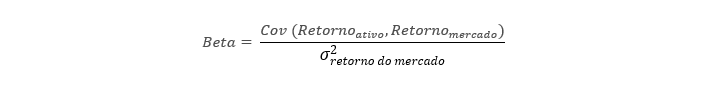


In [21]:
#@title
lista_beta_alt = []

for asset in lista_stocks_beta:
  #teste = (stocks_normal_var[asset].cov(stocks_normal_var['var^BVSP'])) / stocks_normal_var['var^BVSP'].var()
  calculo = (stocks_normal_var[asset].cov(stocks_normal_var.iloc[:,-1])) / stocks_normal_var.iloc[:,-1].var()
  lista_beta_alt.append(calculo)

beta_alt=pd.DataFrame(lista_beta_alt).transpose()
beta_alt.columns=[lista_stocks_beta.str.replace('var','β_')]
beta_alt

,β_BBAS3,β_EGIE3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,0.831093,0.439672,1.848007,0.855604,2.067455,1.999036,0.557716


# 7 - Coeficiente de Determinação R²

O coeficiente é tido como uma medida de confiança como podemos ver na descrição retirada do:

https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste

    O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada.
    Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.
    A definição do R-quadrado é bastante simples: é a porcentagem da variação da variável resposta que é explicada por um modelo linear. Ou:
   
    R-quadrado = Variação explicada/Variação total
    O R-quadrado está sempre entre 0 e 100%:
    0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
    100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

    Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados. No entanto, existem condições importantes para esta diretriz.


Ex:
    
    A figura do R2 demonstra quanto dos movimentos de um fundo podem ser explicados pelos movimentos de seu índice de referência.
    Quanto maior o valor do R2, mais próximo o desempenho do fundo pode ser explicado pelo seu índice, enquanto um fundo com um R2 menor não se comporta muito como o seu índice. E quanto maior o R2, mais relevante o valor Beta.
    Os R2 podem variar de zero, o que significa que não há grau de correlação de desempenho entre uma referência de mercado e um determinado investimento, até 100, o que significa que um investimento está altamente correlacionado com um índice.
    Não é de surpreender que os fundos indexados tenham um valor de R2 exatamente de 100, ou muito próximo a ele, enquanto um fundo cujos movimentos divergem amplamente de seu índice terá um valor muito baixo de R2.



Desta forma, o mesmo pode ser observado juntamente com o Beta.

## a) Cálculo do R²

In [22]:
#@title
lista_r = []

for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  calculo = calculo.score(x_v, y_v) # x_v = ^BVSP, declarado anteriormente
  lista_r.append(calculo)

R_square=pd.DataFrame(lista_r).transpose()
R_square.columns=[lista_stocks_beta.str.replace('var','R²_')]

R_square

,R²_BBAS3,R²_EGIE3,R²_LREN3,R²_MDIA3,R²_MGLU3,R²_MOVI3,R²_WEGE3
0,0.337455,0.189539,0.433686,0.125448,0.202242,0.361737,0.138779


# 8 - Resultados

A partir dos resultados podemos tirar algumas conclusões:

    No caso da minha carteira, podemos observar que as ações não possuem grande correlações entre si. Entretanto algumas como ALSO3 e MOVI3 chegam na casa dos 0,66.
    O índice beta também varia bastante, mostrando que as variações das ações oscila bastante em relação a B3. A BBAS3 é a mais próxima das variações registradas na B3.
    O índice R² que mostra quantos % daquele ativo é explicado pela variação da B3, também ilustra uma grande variação. Apenas a BBAS3 passou dos 0,5 no R².

Após todos os gráficos, tabelas e análises, concluo que a carteira montada por mim é bem diversificada, com baixa correlação entre os ativos e com dependência variada em relação à B3.

Obs: **Os resultados que comentei são do dia 20/12/2020 à 20/12/2021.**

## a) - Matriz de Correlação

Matriz triangular de correlação da carteira estudada.

    Quanto mais perto de 1, indica uma correlação positiva.
    Quanto mais perto de -1, indica uma correlação negativa.
    Quanto mais próximo de 0, indica a ausência de correlação (nula, dispersa).

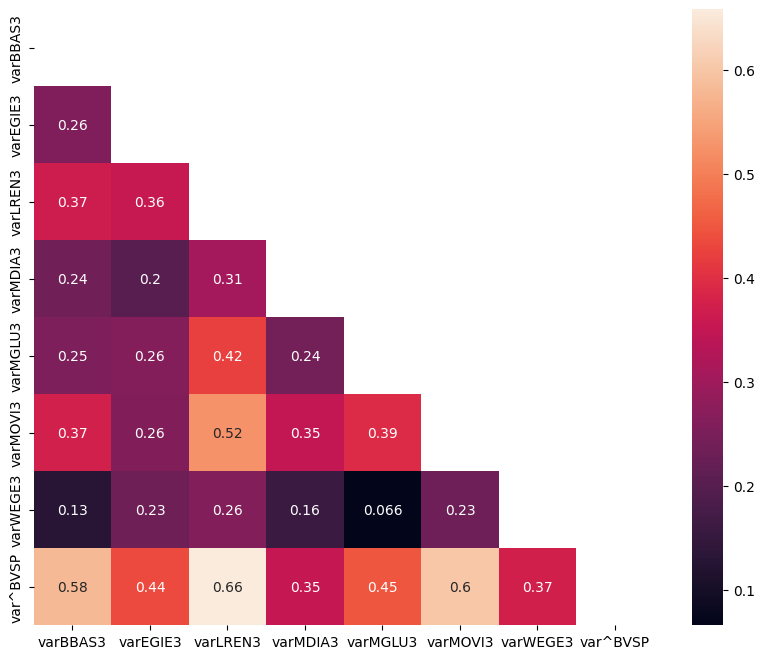

In [23]:
#@title
corrMatrix = stocks_normal_var.corr()
mascara = np.triu(corrMatrix)
plt.rcParams["figure.figsize"] = (10,8)
sn.heatmap(corrMatrix,annot=True, mask=mascara);

## b) Beta (β)



In [24]:
#@title
beta

,β_BBAS3,β_EGIE3,β_LREN3,β_MDIA3,β_MGLU3,β_MOVI3,β_WEGE3
0,0.831093,0.439672,1.848007,0.855604,2.067455,1.999036,0.557716


## c) R_square (R²)

In [25]:
#@title
R_square

,R²_BBAS3,R²_EGIE3,R²_LREN3,R²_MDIA3,R²_MGLU3,R²_MOVI3,R²_WEGE3
0,0.337455,0.189539,0.433686,0.125448,0.202242,0.361737,0.138779


## c) β e R²

In [26]:
#@title
beta.columns = [(lista_stocks.drop(lista_stocks[-1])).str.replace('β_','')]
R_square.columns = [(lista_stocks.drop(lista_stocks[-1])).str.replace('R²_','')]
beta_r2 = pd.concat([beta,R_square], ignore_index=True)
beta_r2.set_index(pd.Index(['β','R²']))

,BBAS3,EGIE3,LREN3,MDIA3,MGLU3,MOVI3,WEGE3
β,0.831093,0.439672,1.848007,0.855604,2.067455,1.999036,0.557716
R²,0.337455,0.189539,0.433686,0.125448,0.202242,0.361737,0.138779


## d) Relação de Risco e Retorno

    #https://www.kaggle.com/kausik123/stocks-analysis-by-regression
    https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/

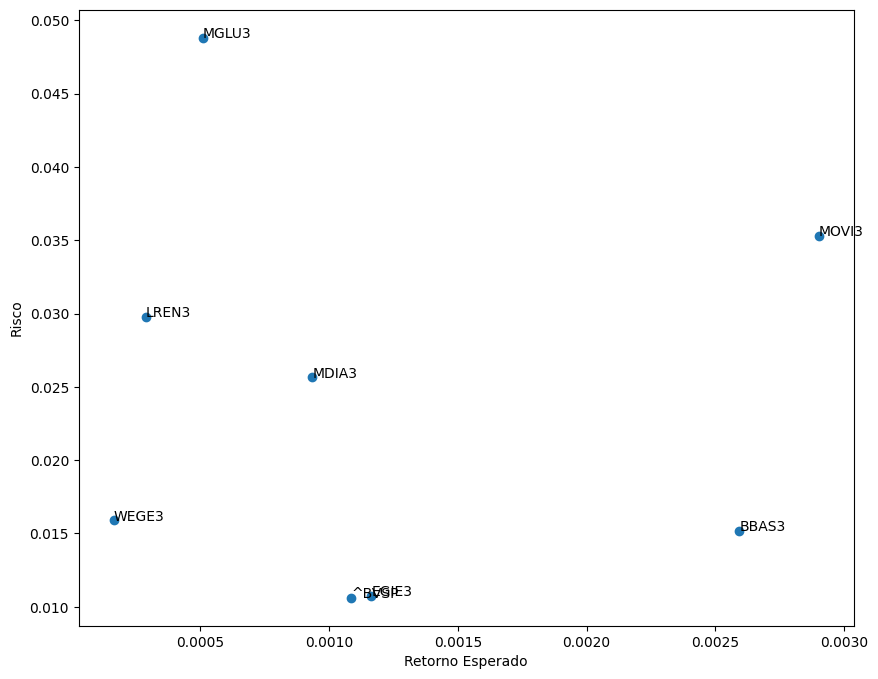

In [27]:
#@title
text = stocks_normal_var.columns.str.replace('var','')
media = stocks_normal_var.mean()
d_v = stocks_normal_var.std()

fig, ax = plt.subplots()
ax.scatter(media,d_v);

for i in range(len(media)):
  plt.annotate(text[i], (media[i], d_v[i]))

plt.xlabel('Retorno Esperado');
plt.ylabel('Risco');

## e) Gráficos de Regressão Linear

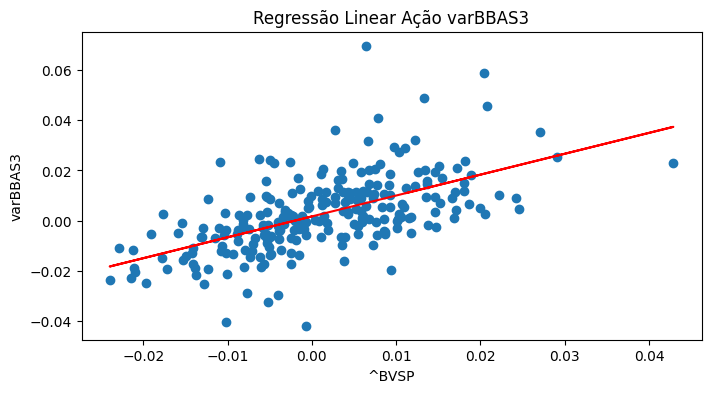

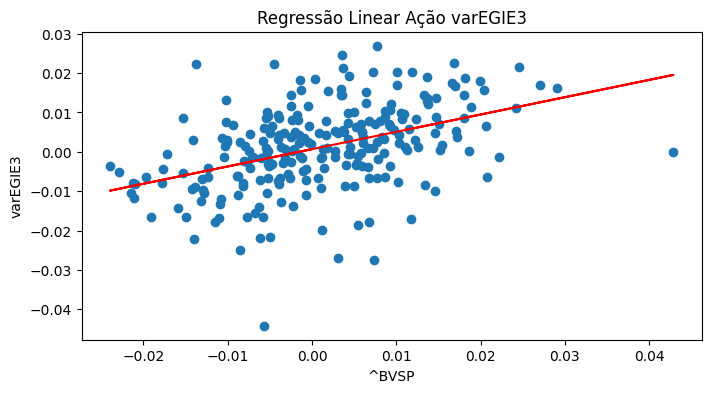

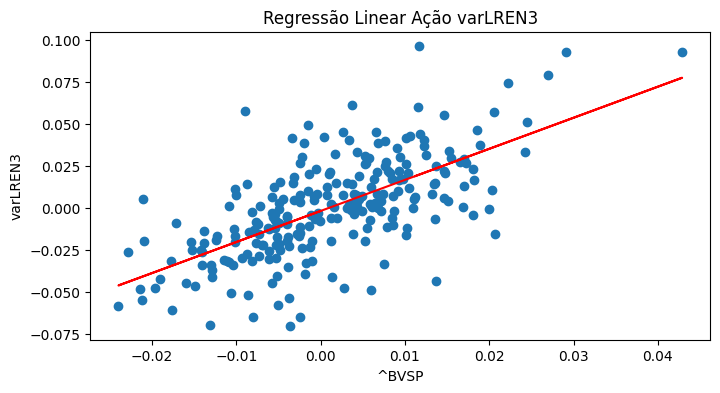

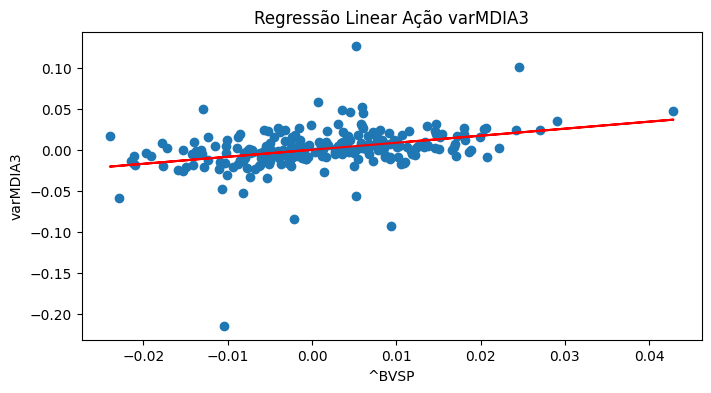

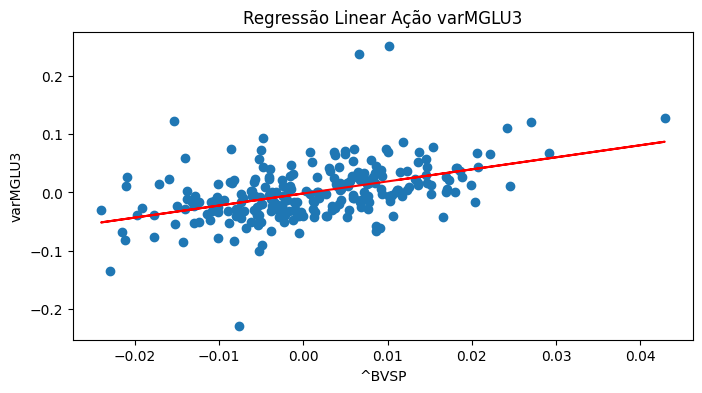

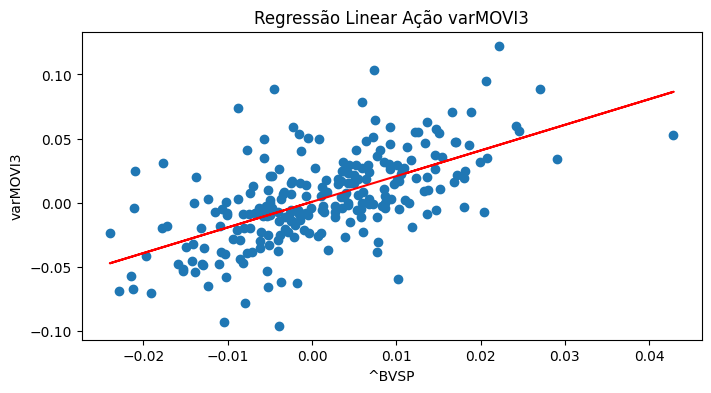

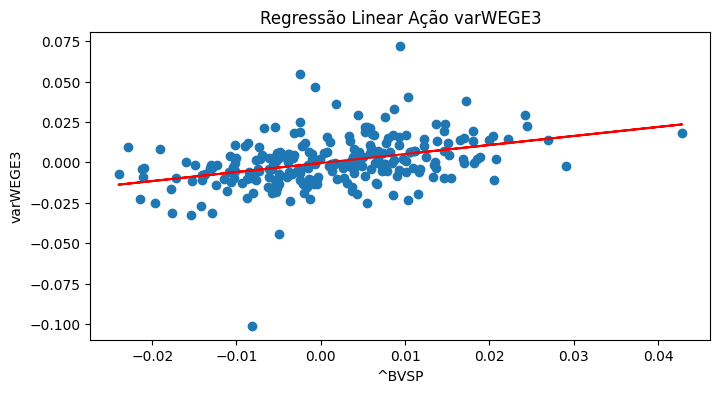

In [28]:
#@title
for asset in lista_stocks_beta:
  y_v = stocks_normal_var[asset]
  calculo = LinearRegression().fit(x_v,y_v)
  plt.figure(figsize=(8,4))
  plt.scatter(x_v,y_v);
  plt.plot(x_v, calculo.predict(x_v), color='red');
  plt.title(f'Regressão Linear Ação {asset}')
  plt.xlabel(stocks_normal.columns[-1])
  plt.ylabel(asset)

  plt.show()

# Extra

## Links para estudo

    https://www.kaggle.com/kausik123/stocks-analysis-by-regression

    https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

    https://www.linkedin.com/pulse/stock-market-prediction-using-python-article-2-smart-curves-khedkar

## Exemplos Comentados

In [29]:
#sn.heatmap(corrMatrix,annot=True, mask=mascara, cmap='YlGnBu'); # Wistia ou YlGnBu

In [30]:
#plot de correlação entre as a variação diária das ações (demora carregar)
# import seaborn as sns
# sns.pairplot(stocks_normal_var);